#  Case Study: Name Verification and Categorization

NAME:- Sumi Chatterjee

Roll Number:- MCA/10068/23

In [1]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Load customer data from CSV file
customer_data = pd.read_csv('dataset.csv')

# Display the first five rows of the CSV file to verify data
print("Customer Details:")
print(customer_data.head())  # Display the first 5 rows

Customer Details:
     Loan ID Customer ID    Caste       Full Name    Father Name  \
0  LN-771687  CID-180965  General  KRISHNA KUNWAR  GORDHAN SINGH   
1  LN-771687  CID-551066  General   SHAMBHU SINGH     KALU SINGH   
2  LN-771687  CID-760294  General   SURAJ RATHORE  SHAMBHU SINGH   
3  LN-450141  CID-990878  General       SUSHILA .      SAGAR MAL   
4  LN-450141  CID-993755  General   VISHAL KHICHI      MOHAN LAL   

     Mother Name       Spouse Name           State  
0   GENDA KUNWAR           SHAMBHU  Madhya Pradesh  
1      ANTAR BAI    KRISHNA KUNWAR  Madhya Pradesh  
2  KRISHNA SINGH               NaN  Madhya Pradesh  
3     KANTA DEVI  MOHAN LAL KHICHI       Rajasthan  
4        SUSHILA               NaN       Rajasthan  


In [2]:
# Import PyPDF2 for working with PDF files
import PyPDF2

# Open the PDF file and extract text
file_path = 'LatestListofScheduledtribes.pdf'
with open(file_path, 'rb') as file:
    reader = PyPDF2.PdfReader(file)  # Use PdfReader for PyPDF2
    number_page = len(reader.pages)  # Get the number of pages
    
    # Extract text from each page
    pdf_text = ""
    for page_number in range(number_page):
        page = reader.pages[page_number]  # Access each page
        page_text = page.extract_text()  # Extract text from the page
        pdf_text += f"\nPage {page_number + 1}:\n{page_text}\n" if page_text else ""
    
    # Print all extracted text for review
    if pdf_text:
        print(pdf_text)
    else:
        print("No text extracted from the PDF.")


Page 1:
MAHARASHTRA  
 
 
1. Andh  
2. Baiga  
3. Barda  
4. Bavacha,  Bamcha  
5. Bhaina  
6. Bharia Bhumia, 
Bhuinhar  Bhumia, 
Pando  
7. Bhattra  
8. Bhil, Bhil Garasia, 
Dholi Bhil, Dungri 
Bhil, Dungri  Garasia, 
Mewasi Bhil, Rawal 
Bhil, Tadvi Bhil, 
Bhagalia, Bhilala, 
Pawra, Vasava, 
Vasave  
9. Bhunjia  
10. Binjhwar  
11. Birhul,  Birhor  
12. Omitted  
13. Dhanka,  Tadvi, 
Tetaria, Valvi  
14. Dhanwar  
15. Dhodia  
16. Dubla,  Talavia, 
Halpati  
17. Gamit,  Gamta,  Gavit, 
Mavchi, Padvi  18. Gond, Rajgond, 
Arakh, Arrakh, 
Agaria, Asur, Badi 
Maria, Bada Maria, 
Bhatola, Bhimma, 
Bhuta, Koilabhuta, 
Koilabhuti, Bhar, 
Bisonhorn Maria, 
Chota Maria, 
Dandami Maria, 
Dhuru, Dhurwa, 
Dhoba, Dhulia,  
Dorla, Gaiki, Gatta, 
Gatti, Gaita, Gond 
Gowari, Hill Maria, 
Kandra, Kalanga, 
Khatola, Koitar, 
Koya, Khirwar, 
Khirwara, Kucha 
Maria, Kuchaki 
Maria, Madia, Maria, 
Mana, Mannewar, 
Moghya, Mogia, 
Monghya, Mudia, 
Muria, Nagarchi, 
Naikpod,  Nagwanshi, 
Ojha, Raj, Sonjhar

In [4]:
#  ST caste names dictionary
st_caste_dict = {
    'Maharashtra': [
        'Andh', 'Baiga', 'Barda', 'Bavacha', 'Bhaina', 'Bharia Bhumia', 'Bharta', 'Bhil',
        'Bhunjia', 'Binjhwar', 'Birhul', 'Dhanka', 'Dhanwar', 'Dhodia', 'Dubla', 'Gamit',
        'Gond', 'Halba', 'Kamar', 'Kathodi', 'Kawar', 'Khairwar', 'Kharia', 'Kokna', 'Kol',
        'Kolam', 'Koli Dhor', 'Koli Mahadev', 'Korku', 'Koya', 'Nagesia', 'Naikda', 'Oraon',
        'Pardhan', 'Pardhi', 'Parja', 'Patelia', 'Pomla', 'Rathawa', 'Sawar', 'Thakur', 'Varli', 'Vitolia'
    ],
    'Rajasthan': [
        'Bhil', 'Bhil Garasia', 'Damor', 'Dhanka', 'Garasia', 'Kathodi', 'Kokna', 'Koli Dhor',
        'Mina', 'Naikda', 'Patelia', 'Seharia'
    ],
    'Uttar Pradesh': [
        'Bhotia', 'Buksa', 'Jaunsari', 'Raji', 'Tharu', 'Gond', 'Kharwar', 'Saharya', 'Parahiya',
        'Baiga', 'Pankha', 'Agariya', 'Patari', 'Chero', 'Bhuiya'
    ]
}

In [5]:
# Function to combine names into a single string, handling missing data and non-string values
def combine_names(row):
    # Using get() to safely handle missing data, and converting all values to strings
    full_name = str(row.get('Full Name', ''))
    father_name = str(row.get('Father Name', ''))
    mother_name = str(row.get('Mother Name', ''))
    spouse_name = str(row.get('Spouse Name', ''))
    
    # Joining all names with spaces in between, filtering out empty strings
    combined_names = ' '.join(filter(None, [full_name, father_name, mother_name, spouse_name]))
    return combined_names

# Apply the function to each row to create a new 'Combined Names' column
customer_data['Combined Names'] = customer_data.apply(combine_names, axis=1)

# Display the updated dataset with the relevant columns
print(customer_data[['Full Name', 'Father Name', 'Mother Name', 'Spouse Name', 'Combined Names']].head())


        Full Name    Father Name    Mother Name       Spouse Name  \
0  KRISHNA KUNWAR  GORDHAN SINGH   GENDA KUNWAR           SHAMBHU   
1   SHAMBHU SINGH     KALU SINGH      ANTAR BAI    KRISHNA KUNWAR   
2   SURAJ RATHORE  SHAMBHU SINGH  KRISHNA SINGH               NaN   
3       SUSHILA .      SAGAR MAL     KANTA DEVI  MOHAN LAL KHICHI   
4   VISHAL KHICHI      MOHAN LAL        SUSHILA               NaN   

                                      Combined Names  
0  KRISHNA KUNWAR GORDHAN SINGH GENDA KUNWAR SHAMBHU  
1  SHAMBHU SINGH KALU SINGH ANTAR BAI KRISHNA KUNWAR  
2      SURAJ RATHORE SHAMBHU SINGH KRISHNA SINGH nan  
3    SUSHILA . SAGAR MAL KANTA DEVI MOHAN LAL KHICHI  
4                VISHAL KHICHI MOHAN LAL SUSHILA nan  


In [22]:
import pandas as pd

# Sample caste dictionary
st_caste_dict = {
    'Maharashtra': ['Andh', 'Baiga', 'Bhil', 'Gond'],
    'Rajasthan': ['Bhil', 'Garasia'],
    'Uttar Pradesh': ['Gond', 'Tharu']
}

# Function to check if any part of the name matches caste names
def check_name_match(row, state):
    combined_name = row['Combined Names']  

    if pd.isna(combined_name) or not combined_name.strip():
        return False  # Return False if no name is found

    combined_name = combined_name.lower()  # Convert to lowercase for case-insensitive matching

    # Check if the state exists in the caste dictionary
    if state in st_caste_dict:
        castes = st_caste_dict[state]  # Get the list of castes for the given state
        for caste in castes:
            # Check if the caste is in the combined name
            if caste.lower() in combined_name:
                return True  # Return True if a match is found

    return False  # Return False if no matches were found

# Create a new 'Name Match' column using the check_name_match function
customer_data['Name Match'] = customer_data.apply(lambda row: check_name_match(row, row['State']), axis=1)

# Display the result by showing the specified columns
print(customer_data[['Full Name', 'Combined Names', 'Name Match']].head())  # Display first few rows

       Full Name        Combined Names  Name Match
0   John Doe Sr.     John Doe Sr., Doe       False
1     Jane Smith     Jane Smith, Smith       False
2    Alice Brown    Alice Brown, Brown       False
3    Bob Johnson  Bob Johnson, Johnson       False
4  Charlie White  Charlie White, White       False


In [7]:
# State-wise analysis
state_match_count = customer_data.groupby('State')['Name Match'].sum()  # Count of matches per state
state_total_count = customer_data.groupby('State')['Loan ID'].count()    # Total loans per state

# Calculate the match percentage
state_match_percentage = (state_match_count / state_total_count) * 100

# Combine results into a single DataFrame
state_analysis = pd.DataFrame({
    'Match Count': state_match_count,
    'Total Count': state_total_count,
    'Match Percentage': state_match_percentage
}).fillna(0)  # Fill NaN values with 0 for states without any matches

# Display the state-wise analysis
print(state_analysis)


                Match Count  Total Count  Match Percentage
State                                                     
Madhya Pradesh            0         2293          0.000000
Maharashtra              76         2863          2.654558
Rajasthan                27         4844          0.557391


In [8]:
# Caste-wise analysis
caste_counts = []  # Initialize a list to hold the counts of each caste by state

# Iterate states and their respective castes defined in the caste dictionary
for state, castes in st_caste_dict.items():
    for caste in castes:
        # Count the number of occurrences of the caste in 'Full Name' for the specified state
        count = customer_data[customer_data['State'] == state]['Full Name'].str.contains(caste, case=False).sum()
        
        # Append a tuple of (state, caste, count) to the list
        caste_counts.append((state, caste, count))

# Convert the results to a DataFrame for easier analysis and viewing
caste_analysis = pd.DataFrame(caste_counts, columns=['State', 'Caste', 'Count'])

# Display the caste-wise analysis DataFrame
print(caste_analysis)


            State    Caste  Count
0     Maharashtra     Andh     19
1     Maharashtra    Baiga      0
2     Maharashtra    Barda      0
3     Maharashtra  Bavacha      0
4     Maharashtra   Bhaina      0
..            ...      ...    ...
65  Uttar Pradesh   Pankha      0
66  Uttar Pradesh  Agariya      0
67  Uttar Pradesh   Patari      0
68  Uttar Pradesh    Chero      0
69  Uttar Pradesh   Bhuiya      0

[70 rows x 3 columns]


In [9]:
# Most frequent caste
most_frequent_caste = caste_analysis.loc[caste_analysis['Count'].idxmax()]

# Least frequent caste
least_frequent_caste = caste_analysis.loc[caste_analysis['Count'].idxmin()]

print("Most Frequent Caste:")
print(most_frequent_caste)

print("\nLeast Frequent Caste:")
print(least_frequent_caste)


Most Frequent Caste:
State    Maharashtra
Caste           Andh
Count             19
Name: 0, dtype: object

Least Frequent Caste:
State    Maharashtra
Caste          Baiga
Count              0
Name: 1, dtype: object


In [15]:
# Count unique castes by state
unique_castes_by_state = customer_data.groupby('State')['Caste'].nunique()  # Count unique castes for each state

# Print the result to see the number of unique castes by state
print(unique_castes_by_state)


State
Madhya Pradesh    8
Maharashtra       7
Rajasthan         8
Name: Caste, dtype: int64


In [11]:
# State-wise table for distinct Loan IDs
loan_id = customer_data[customer_data['Name Match']].groupby('State')['Loan ID'].nunique()
print(loan_id)

State
Maharashtra    42
Rajasthan      18
Name: Loan ID, dtype: int64


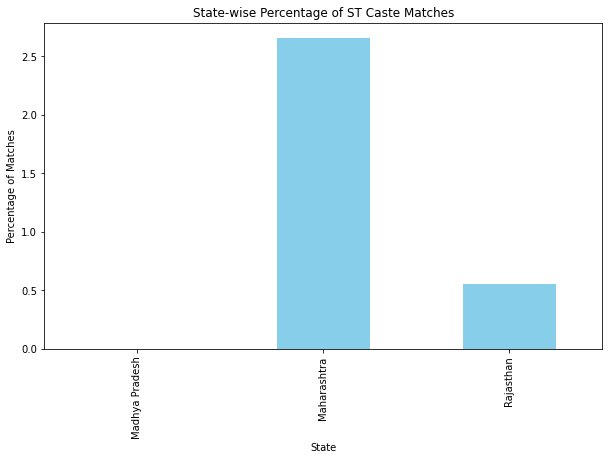

In [12]:
# Importing the pyplot module from matplotlib for data visualization
import matplotlib.pyplot as plt
# Prepare the figure for the bar chart
plt.figure(figsize=(10, 6))
# Plot the state-wise match percentage as a bar chart with a specified color
state_match_percentage.plot(kind='bar', color='skyblue')
# Setting the title of the bar chart
plt.title('State-wise Percentage of ST Caste Matches')
# Labeled the y-axis to indicate what the values represent
plt.ylabel('Percentage of Matches')
# Displaying the bar chart
plt.show()  # Show the plot


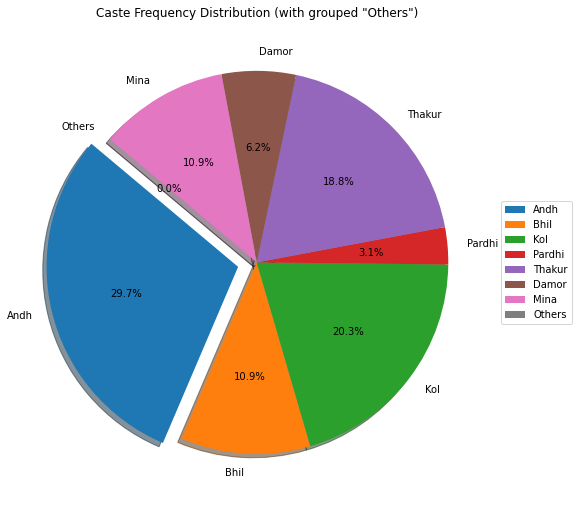

In [13]:
# Caste-wise counts
caste_counts = caste_analysis.set_index('Caste')['Count'].to_dict()

# Determine the most and least frequent castes
most_frequent_caste = max(caste_counts, key=caste_counts.get)
least_frequent_caste = min(caste_counts, key=caste_counts.get)

# Group smaller categories into 'Others' if they contribute less than a threshold percentage
threshold = 1.5  # Threshold for grouping smaller castes into 'Others'

# Calculate total for percentage calculation
total_count = sum(caste_counts.values())

# Identify small and large caste labels based on the threshold
small_caste_labels = {caste: count for caste, count in caste_counts.items() if (count / total_count) * 100 < threshold}
large_caste_labels = {caste: count for caste, count in caste_counts.items() if (count / total_count) * 100 >= threshold}

# Add all small categories into 'Others'
others_count = sum(small_caste_labels.values())
large_caste_labels['Others'] = others_count

# Data for the pie chart
caste_labels = list(large_caste_labels.keys())
caste_sizes = list(large_caste_labels.values())

# Creating the pie chart with enhanced clarity
plt.figure(figsize=(8, 8))
explode = [0.1 if label == most_frequent_caste else 0 for label in caste_labels]  # Explode the most frequent caste

plt.pie(caste_sizes, explode=explode, labels=caste_labels, autopct='%1.1f%%', shadow=True, startangle=140)

# Add legend to the right for clearer label display
plt.legend(caste_labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=10)

# Title
plt.title('Caste Frequency Distribution (with grouped "Others")')

# Show the chart
plt.tight_layout()
plt.show()


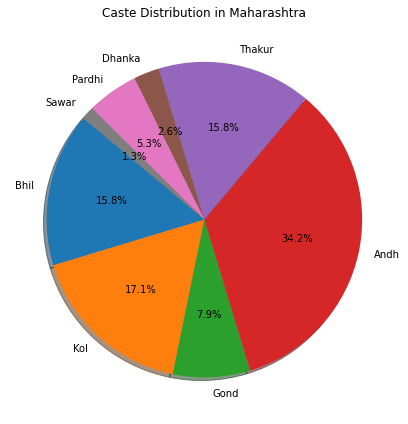

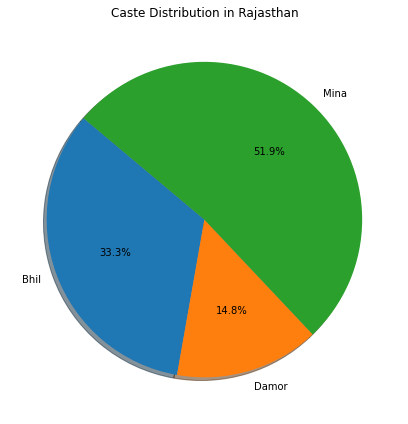

No caste matches found for Uttar Pradesh


In [14]:
from collections import Counter  # Import Counter from collections to count occurrences

# Given caste dictionary mapping states to their respective castes
st_caste_dict = {
    'Maharashtra': [
        'Andh', 'Baiga', 'Barda', 'Bavacha', 'Bhaina', 'Bharia Bhumia', 'Bharta',
        'Bhil', 'Bhunjia', 'Binjhwar', 'Birhul', 'Dhanka', 'Dhanwar', 'Dhodia', 'Dubla', 'Gamit',
        'Gond', 'Halba', 'Kamar', 'Kathodi', 'Kawar', 'Khairwar', 'Kharia', 'Kokna', 'Kol', 'Kolam',
        'Koli Dhor', 'Koli Mahadev', 'Korku', 'Koya', 'Nagesia', 'Naikda', 'Oraon', 'Pardhan', 'Pardhi',
        'Parja', 'Patelia', 'Pomla', 'Rathawa', 'Sawar', 'Thakur', 'Varli', 'Vitolia'
    ],
    'Rajasthan': [
        'Bhil', 'Bhil Garasia', 'Damor', 'Dhanka', 'Garasia', 'Kathodi', 'Kokna', 'Koli Dhor',
        'Mina', 'Naikda', 'Patelia', 'Seharia'
    ],
    'Uttar Pradesh': [
        'Bhotia', 'Buksa', 'Jaunsari', 'Raji', 'Tharu', 'Gond', 'Kharwar', 'Saharya', 'Parahiya',
        'Baiga', 'Pankha', 'Agariya', 'Patari', 'Chero', 'Bhuiya'
    ]
}

#function to match caste names based on state and names
def match_caste(state, names, st_caste_dict):
    st_caste_list = st_caste_dict.get(state, [])  # Get caste list for the state
    for name in names:
        if isinstance(name, str):  # Ensure name is a string
            for caste in st_caste_list:
                if caste.lower() in name.lower():  # Check if caste is part of the name
                    return caste
    return None  # Return None if no match is found

# Extracting and count caste matches from customer_data
caste_matches = []

# Iterate through each row in the customer_data DataFrame
for idx, row in customer_data.iterrows():
    state = row['State']  # Get the state for the current row
    # Prepare names to check for caste matching
    names_to_check = [row['Full Name'], row['Father Name'], row['Mother Name'], row['Spouse Name']]
    names_to_check = [name for name in names_to_check if name]  # Filter out None values
    matched_caste = match_caste(state, names_to_check, st_caste_dict)  # Match caste
    if matched_caste:  # If a match is found, append to the list
        caste_matches.append((state, matched_caste))

# Creating a pie chart for each state showing caste distribution
for state in st_caste_dict.keys():
    # Get matched castes for the current state
    state_caste_matches = [caste for st, caste in caste_matches if st == state]

    # Count occurrences of each caste in the state
    caste_counts = Counter(state_caste_matches)

    if caste_counts:  # If there are caste counts, create a pie chart
        # Pie chart
        plt.figure(figsize=(6, 6))  # Set the figure size
        plt.pie(caste_counts.values(), labels=caste_counts.keys(), autopct='%1.1f%%', shadow=True, startangle=140)
        plt.title(f'Caste Distribution in {state}')  # Set the title for the pie chart
        plt.tight_layout()  # Adjust layout to fit the pie chart nicely
        plt.show()  # Display the pie chart
    else:
        print(f"No caste matches found for {state}")  # Print message if no matches found
